<a href="https://colab.research.google.com/github/fcadiz/vespula2/blob/master/Entrenamiento_con_guardado_drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to train an object detection model easy for free](https://www.dlology.com/blog/how-to-train-an-object-detection-model-easy-for-free/) | DLology Blog

## Configs and Hyperparameters

Support a variety of models, you can find more pretrained model from [Tensorflow detection model zoo: COCO-trained models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md#coco-trained-models), as well as their pipline config files in [object_detection/samples/configs/](https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs).

In [6]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [24]:
# If you forked the repository, you can replace the link.
repo_url = 'https://github.com/fcadiz/vespula2'
 
# Number of training steps.
num_steps = 4000  # 200000
 
# Number of evaluation steps.
num_eval_steps = 50
 
MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'ssd_mobilenet_v3': {
        'model_name': 'ssd_mobilenet_v3_large_coco_2020_01_14',
        'pipeline_file': 'ssdlite_mobilenet_v3_large_320x320_coco.config',
        'batch_size': 40
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    }
}
 
# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'ssd_mobilenet_v2'
 
# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']
 
# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']
 
# Training batch size fits in Colabe's Tesla K80 GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

## Clone the `object_detection_demo` repository or your fork.

In [3]:
import os
 
%cd /content
 
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))
 
!git clone {repo_url}
%cd {repo_dir_path}
!git pull

/content
fatal: destination path 'vespula2' already exists and is not an empty directory.
/content/vespula2
Already up to date.


## Install required packages

In [7]:
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
 
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk lvis

!pip install lvis

 
!pip install -q Cython contextlib2 pillow lxml matplotlib lvis
 
!pip install -q pycocotools
 
%cd /content/models/research/
!pip install .
 
%cd /content/models/research/slim
!pip install .
 
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
 
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
 
!python object_detection/builders/model_builder_test.py

!pip install -q torchvision

/content
fatal: destination path 'models' already exists and is not an empty directory.
E: Unable to locate package lvis
/content/models/research
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1368044 sha256=5e95a4c79d406aaa7ea155ba44afeff11755015aafa20bf8fb973e8671daccc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-fegplk_2/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
/content/models/research/slim
Processing /content/models/research/slim
  Created wheel for slim: filename=slim-0.1-cp36-none-any.whl size=231267 sha256=0cdcaab9f1f7c9da315a7c03bd3425eeb96efe7bf8ace8cf6d0b5a9758e22da2
  Stored in directory: /tmp/pip-ephem-wheel-cache-733ktd6s/wheels/c0/cb/18/e76d02033e40846187fac06f0f855c6434d52aadf580451f20

## Prepare `tfrecord` files

Use the following scripts to generate the `tfrecord` files.
```bash
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt
```

In [8]:
%cd {repo_dir_path}
 
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
# !python xml_to_csv.py -i /content/vespula2 -o data/annotations/train_labels.csv -l data/annotations
 
# Convert test folder annotation xml files to a single csv.
# !python xml_to_csv.py -i /content/vespula2 -o data/annotations/test_labels.csv
 
# Generate `train.record`
# !python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=/content/vespula2/data/images/train --label_map data/annotations/label_map.pbtxt
 
# Generate `test.record`
# !python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=/content/vespula2/data/images/test --label_map data/annotations/label_map.pbtxt
 
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
#!python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations
 
# Convert test folder annotation xml files to a single csv.
#!python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv
 
# Generate `train.record`
!python generate_tfrecord.py --csv_input=/content/vespula2/data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=/content/vespula2/data/images/train --label_map data/annotations/label_map.pbtxt
 
# Generate `test.record`
!python generate_tfrecord.py --csv_input=/content/vespula2/data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=/content/vespula2/data/images/test --label_map data/annotations/label_map.pbtxt

/content/vespula2
Successfully created the TFRecords: /content/vespula2/data/annotations/train.record
Successfully created the TFRecords: /content/vespula2/data/annotations/test.record


In [9]:
test_record_fname = '/content/vespula2/data/annotations/test.record'
train_record_fname = '/content/vespula2/data/annotations/train.record'
label_map_pbtxt_fname = '/content/vespula2/data/annotations/label_map.pbtxt'

## Download base model

In [10]:
%cd /content/models/research
 
import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'
 
if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
 
tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()
 
os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/content/models/research


In [11]:
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research/pretrained_model
total 135M
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 .
drwxr-xr-x 24 root   root  4.0K Nov  8 19:13 ..
-rw-r--r--  1 345018 89939   77 Mar 30  2018 checkpoint
-rw-r--r--  1 345018 89939  67M Mar 30  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 89939  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 89939  15K Mar 30  2018 model.ckpt.index
-rw-r--r--  1 345018 89939 3.4M Mar 30  2018 model.ckpt.meta
-rw-r--r--  1 345018 89939 4.2K Mar 30  2018 pipeline.config
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 saved_model


In [12]:
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/models/research/pretrained_model/model.ckpt'

## Configuring a Training Pipeline

In [25]:
import os
pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/', pipeline_file)
#pipeline_fname = os.path.join('/content/drive/My Drive/colab_2_11_2020/', pipeline_file)
 
assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [26]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [27]:
import re
 
num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)
 
    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)
 
    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)
 
    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    f.write(s)

In [28]:
!cat {pipeline_fname}

# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 2
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_

Con esto cambio la dirección en donde se guardan los checkpoints y otros archivos.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
model_dir = '/content/models/research/pretrained_model'
# Optionally remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

## Run Tensorboard(Optional)

In [17]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2020-11-05 12:49:49--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.205.86.27, 3.213.190.117, 3.230.235.205, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.205.86.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  17.2MB/s    in 0.8s    

2020-11-05 12:49:50 (17.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [18]:
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [19]:
get_ipython().system_raw('./ngrok http 6006 &')

### Get Tensorboard link

In [20]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://ad09dcdfec6b.ngrok.io


## Train the model

In [30]:
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir=/content/drive/My\ Drive/colab_7_11_2020 \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

W1108 19:27:16.772424 140605278410624 model_lib.py:793] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 4000
I1108 19:27:16.772644 140605278410624 config_util.py:552] Maybe overwriting train_steps: 4000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1108 19:27:16.772748 140605278410624 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I1108 19:27:16.772840 140605278410624 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1108 19:27:16.772925 140605278410624 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1108 19:27:16.773039 140605278410624 model_lib.py:809] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_t

se deben guardar los archivos en esa carpeta del drive, y se puede seguir entrenando al aumentar el número de pasos en la programación al comienzo del cuaderno.
Después se echa a correr de nuevo y continúa el entrenamiento, que comienza en el paso anterior.

In [31]:
# cd /content/vespula2/modelo_definitivo
# cd /content/vespula2
!cd /content/drive/My\ Drive/colab_7_11_2020

In [32]:
!ls /content/drive/My\ Drive/colab_7_11_2020

checkpoint
eval_0
events.out.tfevents.1604786631.52896e06d29c
events.out.tfevents.1604863249.73ac74a80528
events.out.tfevents.1604863348.73ac74a80528
events.out.tfevents.1604863651.73ac74a80528
export
graph.pbtxt
model.ckpt-0.data-00000-of-00001
model.ckpt-0.index
model.ckpt-0.meta
model.ckpt-1660.data-00000-of-00001
model.ckpt-1660.index
model.ckpt-1660.meta
model.ckpt-2000.data-00000-of-00001
model.ckpt-2000.index
model.ckpt-2000.meta
model.ckpt-3746.data-00000-of-00001
model.ckpt-3746.index
model.ckpt-3746.meta
model.ckpt-4000.data-00000-of-00001
model.ckpt-4000.index
model.ckpt-4000.meta


In [40]:
# limpiar la carpeta local de destino
!rm -rf {'/content/models/research/pretrained_model'}
# os.makedirs('/content/models/research/pretrained_model', exist_ok=True)

lo de abajo solo se usa cuando se quiere vacear esa carpeta

In [49]:
!rm -rf {'/content/models/research/fine_tuned_model'}

In [41]:
%cp -r '/content/drive/My Drive/colab_7_11_2020/' '/content/models/research/pretrained_model'

In [35]:
!cd /content/models/research/pretrained_model

In [42]:
!ls /content/models/research/pretrained_model

checkpoint
eval_0
events.out.tfevents.1604786631.52896e06d29c
events.out.tfevents.1604863249.73ac74a80528
events.out.tfevents.1604863348.73ac74a80528
events.out.tfevents.1604863651.73ac74a80528
export
graph.pbtxt
model.ckpt-0.data-00000-of-00001
model.ckpt-0.index
model.ckpt-0.meta
model.ckpt-1660.data-00000-of-00001
model.ckpt-1660.index
model.ckpt-1660.meta
model.ckpt-2000.data-00000-of-00001
model.ckpt-2000.index
model.ckpt-2000.meta
model.ckpt-3746.data-00000-of-00001
model.ckpt-3746.index
model.ckpt-3746.meta
model.ckpt-4000.data-00000-of-00001
model.ckpt-4000.index
model.ckpt-4000.meta


In [ ]:
# Legacy way of training(also works).
# !python /content/models/research/object_detection/legacy/train.py --logtostderr --train_dir={model_dir} --pipeline_config_path={pipeline_fname}

## Exporting a Trained Inference Graph
/content/models/research/fine_tuned_model/frozen_inference_graph.pb

In [ ]:
import re
import numpy as np

output_directory = './fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

# Exporting a TFLite compatible Frozen Graph

In [ ]:
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
--pipeline_config_path='/content/models/research/fine_tuned_model/pipeline.config' \
--trained_checkpoint_prefix='/content/models/research/pretrained_model/model.ckpt-4000' \
--output_directory='./fine_tuned_model' \
--add_postprocessing_op=True

Transformar a detect.tflite

In [ ]:
!toco \
--graph_def_file='/content/models/research/fine_tuned_model/tflite_graph.pb' \
--output_file='/content/models/research/fine_tuned_model/detect.tflite' \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3'  \
--inference_type=FLOAT \
--allow_custom_ops

Este es el saved_model.pb y ya está listo

In [ ]:
/content/models/research/fine_tuned_model/saved_model/saved_model.pb

# De aquí hacia abajo no usar, son solo pruebas

In [ ]:
!toco \
--graph_def_file='/content/test/tflite_graph.pb' \
--output_file='/content/test/detect.tflite' \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=QUANTIZED_UINT8 \
--mean_values=128 \
--std_dev_values=128 \
--change_concat_input_ranges=false \
--allow_custom_ops

este es floating point

In [ ]:
last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
   --pipeline_config_path={pipeline_fname} \
  --output_directory={output_directory} \
  --trained_checkpoint_prefix={last_model_path}

In [ ]:
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
--pipeline_config_path={pipeline_fname} \
--trained_checkpoint_prefix '/content/models/research/training/model.ckpt-1000' \
--output_directory={output_directory} \
--add_postprocessing_op=True 
--max_detections=10

In [ ]:
last_model_path = '/content/models/research/training'
print(last_model_path)

!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
--pipeline_config_path='/content/models/research/training/pipeline.config' \
--output_directory={output_directory} \
--trained_checkpoint_prefix='/content/models/research/training/model.ckpt-20000.index' \
--add_postprocessing_op=True \
--max_detections=10


# este sí sirve

In [ ]:
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
--pipeline_config_path='/content/test/pipeline.config' \
--trained_checkpoint_prefix='/content/test//content/test/model.ckpt-20000.data-00000-of-00001' \
--output_directory='/content/test/' \
--add_postprocessing_op=True \
--max_detections=10 \

Instructions for updating:
Please use `layer.__call__` method instead.
W1030 02:21:58.408673 140611658516352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1030 02:22:00.573782 140611658516352 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1030 02:22:00.647839 140611658516352 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1030 02:22:00.717678 140611658516352 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [ ]:
!ls {output_directory}

ls: cannot access '{output_directory}': No such file or directory


# Convert to DETECT.TFLITE

# este es el bueno

In [ ]:
!toco \
--graph_def_file='/content/vespula2/test/tflite_graph.pb' \
--output_file='/content/vespula2/test/detect.tflite' \
--input_shapes=1,320,320,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops

In [ ]:
!toco \
--graph_def_file='/content/models/research/training/tflite_graph.pb' \ 
--output_file='/content/models/research/training/detect.tflite' \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops

In [ ]:
!toco \
 --graph_def_file='/content/models/research/training/tflite_graph.pb' \
 --output_file='/content/models/research/training/detect.tflite' \
 --input_shapes=1,300,300,3 \
 --input_arrays=normalized_input_image_tensor \
 --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
 --inference_type=FLOAT \
 --allow_custom_ops

Este de acá abajo funciona bien. Cambié el 300,300 por 320,320, porque el modelo mobile_v3 usa ese tamaño de archivos y acá al ponerlo en la forma por defecto me entregaba error

In [ ]:
!toco \
--graph_def_file='/content/models/research/training/tflite_graph.pb' \
--output_file='/content/models/research/training/detect.tflite' \
--input_shapes=1,320,320,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops

In [ ]:
!toco \
--graph_def_file='/content/models/research/training/tflite_graph.pb' \
--output_file='/content/models/research/training/detect.tflite' \
--input_format=TENSORFLOW_GRAPHDEF --output_format=TFLITE \
--inference_type=QUANTIZED_UINT8 \
--input_shapes=1,320,320,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3 \
--std_dev_values=128 \
--mean_values=128 \
--inference_type=FLOAT \
--allow_custom_ops \
--default_ranges_min=0 \
--default_ranges_max=6

## Download the model `.pb` file

In [ ]:
import os

pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

In [ ]:
!ls -alh {pb_fname}

ls: cannot access '{pb_fname}': No such file or directory


In [ ]:
!toco \
 --graph_def_file='/content/vespula2/test/tflite_graph.pb' \
 --output_file='/content/vespula2/test/detect.tflite' \
 --input_shapes=1,300,300,3 \
 --input_arrays=normalized_input_image_tensor \
 --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
 --inference_type=FLOAT \
 --allow_custom_ops

In [ ]:
!toco \
--saved_model_dir='/content/vespula2/test' \
--output_file='/content/vespula2/test/detect.tflite' \
--output_format=TFLITE \
--input_shapes=1,320,320,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=QUANTIZED_UINT8 \
--mean_values=128 \
--std_dev_values=127 \
--change_concat_input_ranges=False \
--allow_custom_ops

# DESDE AQUÍ SÍ SE PUEDE USAR

### Option1 : upload the `.pb` file to your Google Drive
Then download it from your Google Drive to local file system.

During this step, you will be prompted to enter the token.

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fname = os.path.basename(pb_fname)
# Create & upload a text file.
uploaded = drive.CreateFile({'title': fname})
uploaded.SetContentFile(pb_fname)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1dEO1VqnueeJY8KsaTMmPIggvskA5P_Zd


### Option2 :  Download the `.pb` file directly to your local file system
This method may not be stable when downloading large files like the model `.pb` file. Try **option 1** instead if not working.

In [ ]:
from google.colab import files
files.download(pb_fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Download the `label_map.pbtxt` file

In [ ]:
from google.colab import files
files.download(label_map_pbtxt_fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Download the modified pipline file
If you plan to use OpenVINO toolkit to convert the `.pb` file to inference faster on Intel's hardware (CPU/GPU, Movidius, etc.)

In [ ]:
files.download(pipeline_fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !tar cfz fine_tuned_model.tar.gz fine_tuned_model
# from google.colab import files
# files.download('fine_tuned_model.tar.gz')

## Run inference test
Test with images in repository `object_detection_demo/test` directory.

In [59]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "/content/models/research/fine_tuned_model/frozen_inference_graph.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = "/content/vespula2/data/annotations/label_map.pbtxt"

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "/content/vespula2/data/images/raw")

# assert os.path.isfile(pb_fname) DELETED BECAUSE IVE USED ANOTHER, COMPLETE PATH TO PB FILE
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/vespula2/data/images/raw/9k_ (6).jpg', '/content/vespula2/data/images/raw/3.jpg', '/content/vespula2/data/images/raw/9k_ (5).jpg', '/content/vespula2/data/images/raw/2Q__.jpg', '/content/vespula2/data/images/raw/7.jpg']


/content/models/research/object_detection


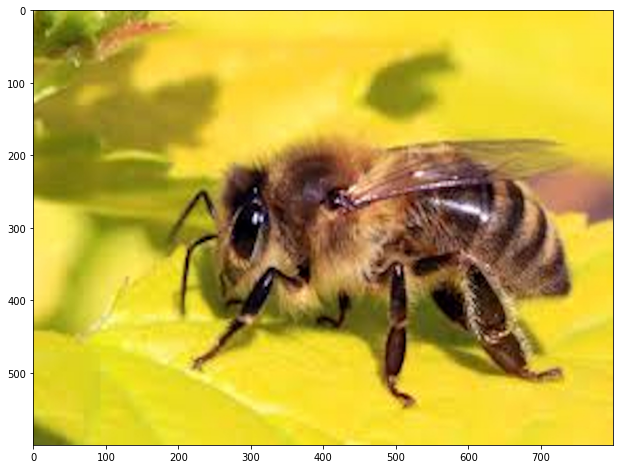

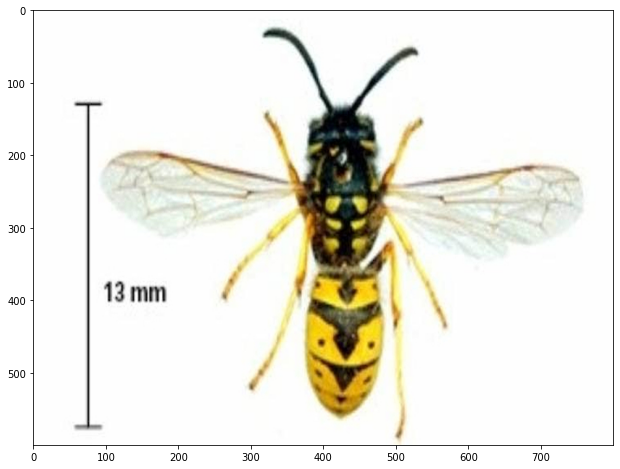

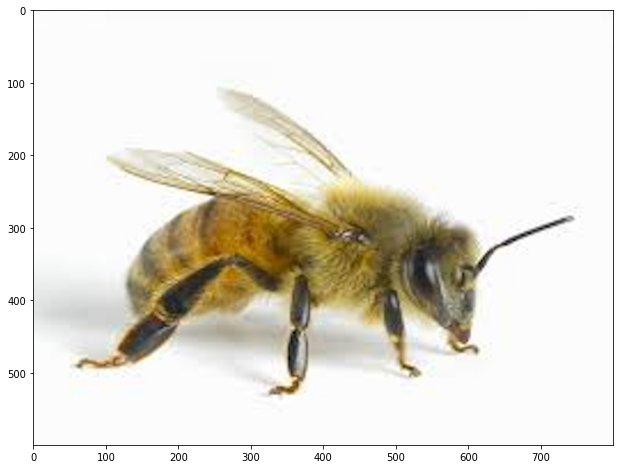

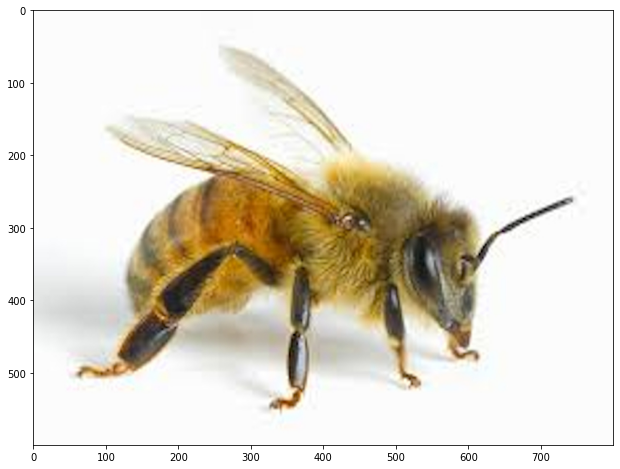

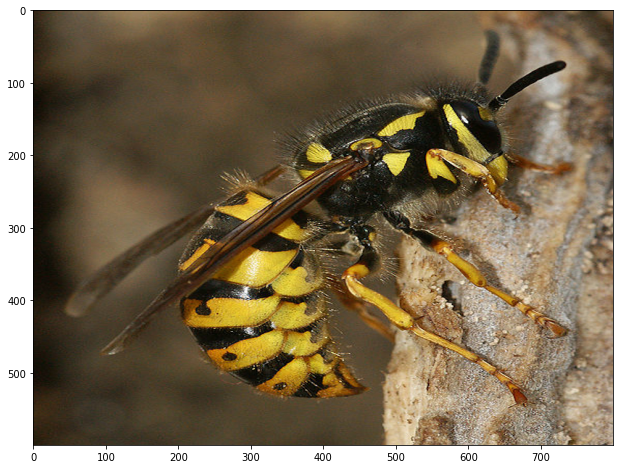

In [60]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)